In [1]:
from nuimages import NuImages

In [2]:
nuim = NuImages(dataroot='/media/parashuram/AutoData/nuImagesMini/', version='v1.0-mini', verbose=True, lazy=True) 

Loading nuImages tables for version v1.0-mini...
Done loading in 0.000 seconds (lazy=True).


In [3]:
nuim.table_names

['attribute',
 'calibrated_sensor',
 'category',
 'ego_pose',
 'log',
 'object_ann',
 'sample',
 'sample_data',
 'sensor',
 'surface_ann']

In [4]:
nuim.category[0]

Loaded 25 category(s) in 0.001s,


{'token': '63a94dfa99bb47529567cd90d3b58384',
 'name': 'animal',
 'description': 'All animals, e.g. cats, rats, dogs, deer, birds.'}

In [5]:
sample_idx = 0
sample = nuim.sample[sample_idx]
sample

Loaded 50 sample(s) in 0.000s,


{'token': '09acd654cb514bdeab8e3afedad74fca',
 'timestamp': 1535352274870176,
 'log_token': '4ed5d1230fcb48d39db895f754e724f9',
 'key_camera_token': '0128b121887b4d0d86b8b1a43ac001e9'}

In [6]:
sample = nuim.get('sample', sample['token'])
sample

{'token': '09acd654cb514bdeab8e3afedad74fca',
 'timestamp': 1535352274870176,
 'log_token': '4ed5d1230fcb48d39db895f754e724f9',
 'key_camera_token': '0128b121887b4d0d86b8b1a43ac001e9'}

In [7]:
sample_idx_check = nuim.getind('sample', sample['token'])
assert sample_idx == sample_idx_check

In [8]:
key_camera_token = sample['key_camera_token']
print(key_camera_token)

0128b121887b4d0d86b8b1a43ac001e9


Loaded 650 sample_data(s) in 0.003s,
Loaded 58 surface_ann(s) in 0.001s,
Loaded 506 object_ann(s) in 0.002s,
Loaded 12 attribute(s) in 0.000s,


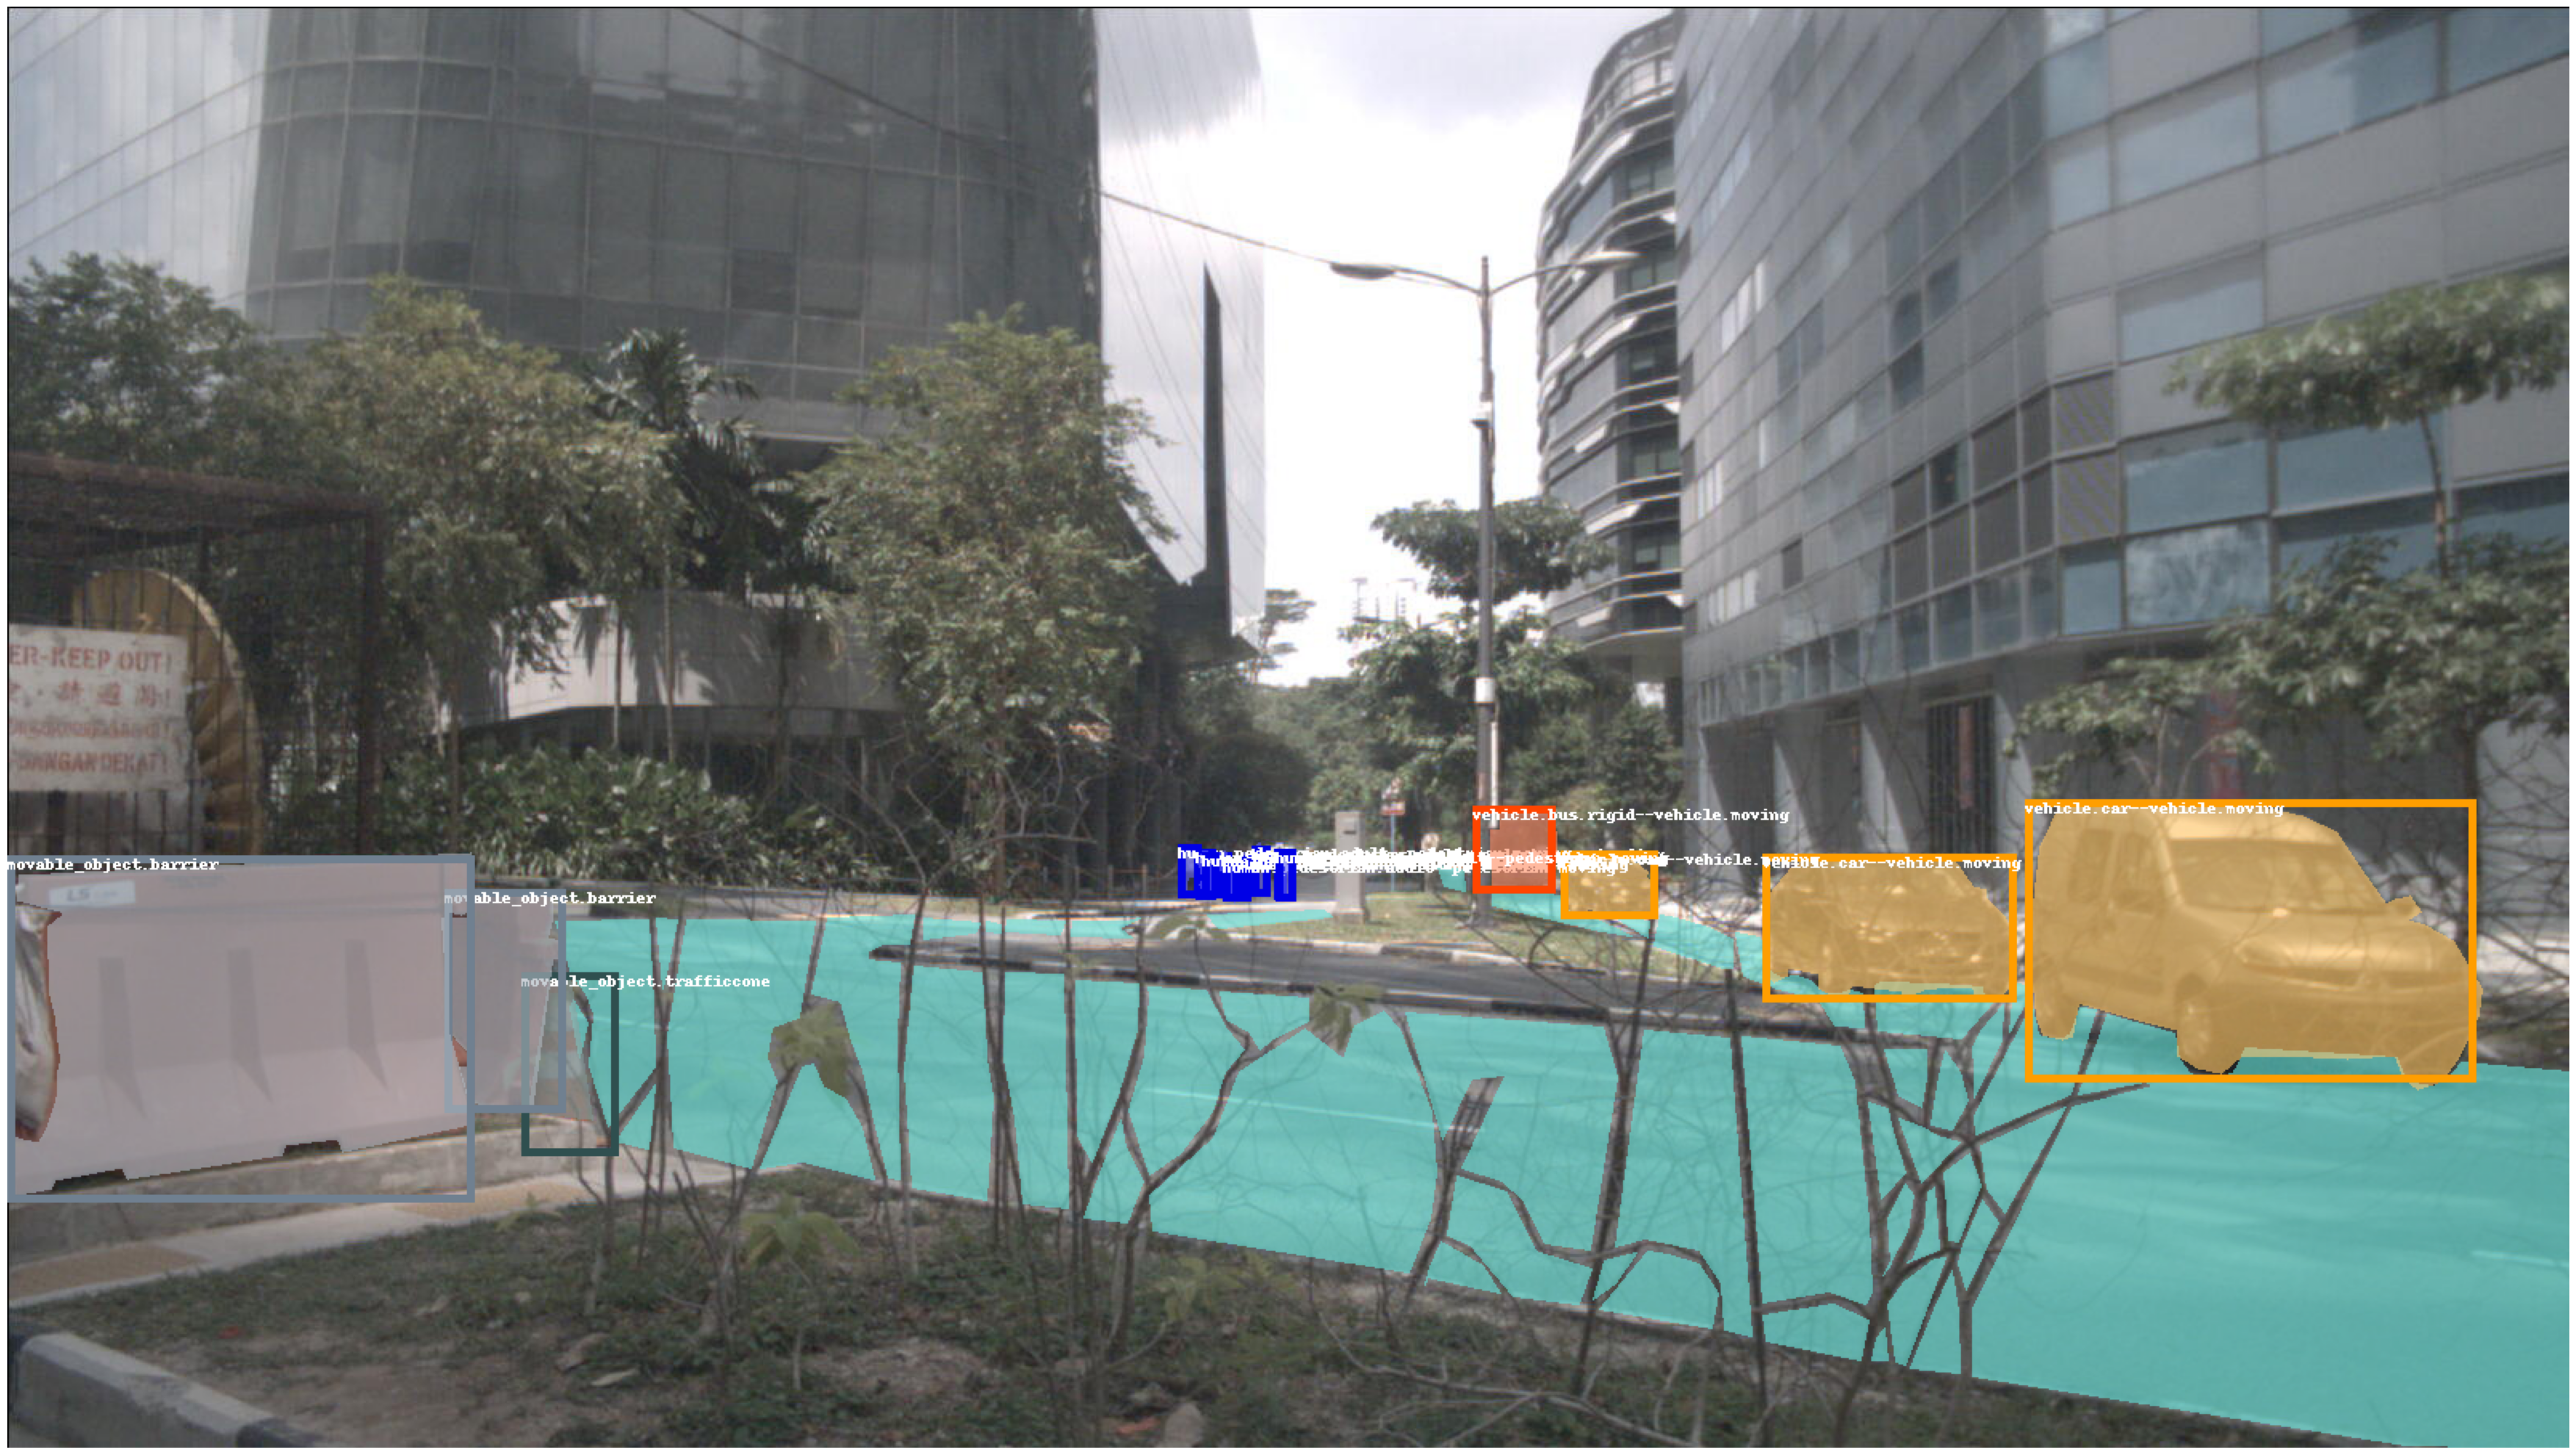

In [9]:
nuim.render_image(key_camera_token, annotation_type='all',
                  with_category=True, with_attributes=True, box_line_width=-1, render_scale=5)

In [10]:
object_tokens, surface_tokens = nuim.list_anns(sample['token'])

Printing object annotations:
06eed0ca8b164b84bbb2851de1ed2c13 vehicle.car ['vehicle.moving']
0e8ba57c7b69482c88319f5c1b4deeb0 movable_object.trafficcone []
11ec9a46540443339e2e38afbe31f7b1 human.pedestrian.adult ['pedestrian.standing']
4b27e4a70d464cb2a2f33d5dbcf85094 human.pedestrian.adult ['pedestrian.moving']
4c76bc9ee7da40668f1d4b294209ae3b human.pedestrian.adult ['pedestrian.standing']
4e61ccd6905644adb0556e1f336cee79 movable_object.barrier []
584cb4bd0e7c4a0b8b1169191ca828a1 vehicle.car ['vehicle.moving']
677a87b7df1a4ee7a7a36bab569cccbd human.pedestrian.adult ['pedestrian.moving']
683e330396134c6393fd77187194990c human.pedestrian.adult ['pedestrian.moving']
82e0c68c0f2440bcb041a51a6f116513 human.pedestrian.adult ['pedestrian.moving']
8dc2b24b1a69434a8aade0cb4e308e8e vehicle.car ['vehicle.moving']
924572ff00404ae59d1ee2f6f6c92274 human.pedestrian.adult ['pedestrian.moving']
9b8ea679730b43d7b6631ceeb56e0ccf human.pedestrian.adult ['pedestrian.moving']
a457fc08800444bc83900e3a12b00

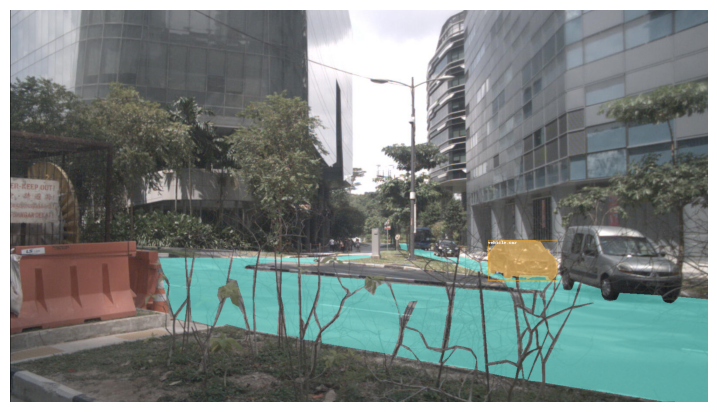

In [11]:
nuim.render_image(key_camera_token, with_category=True, object_tokens=[object_tokens[0]], surface_tokens=[surface_tokens[0]])

In [ ]:
nuim.render_image(key_camera_token, with_category=True, surface_tokens=[surface_tokens[0]])

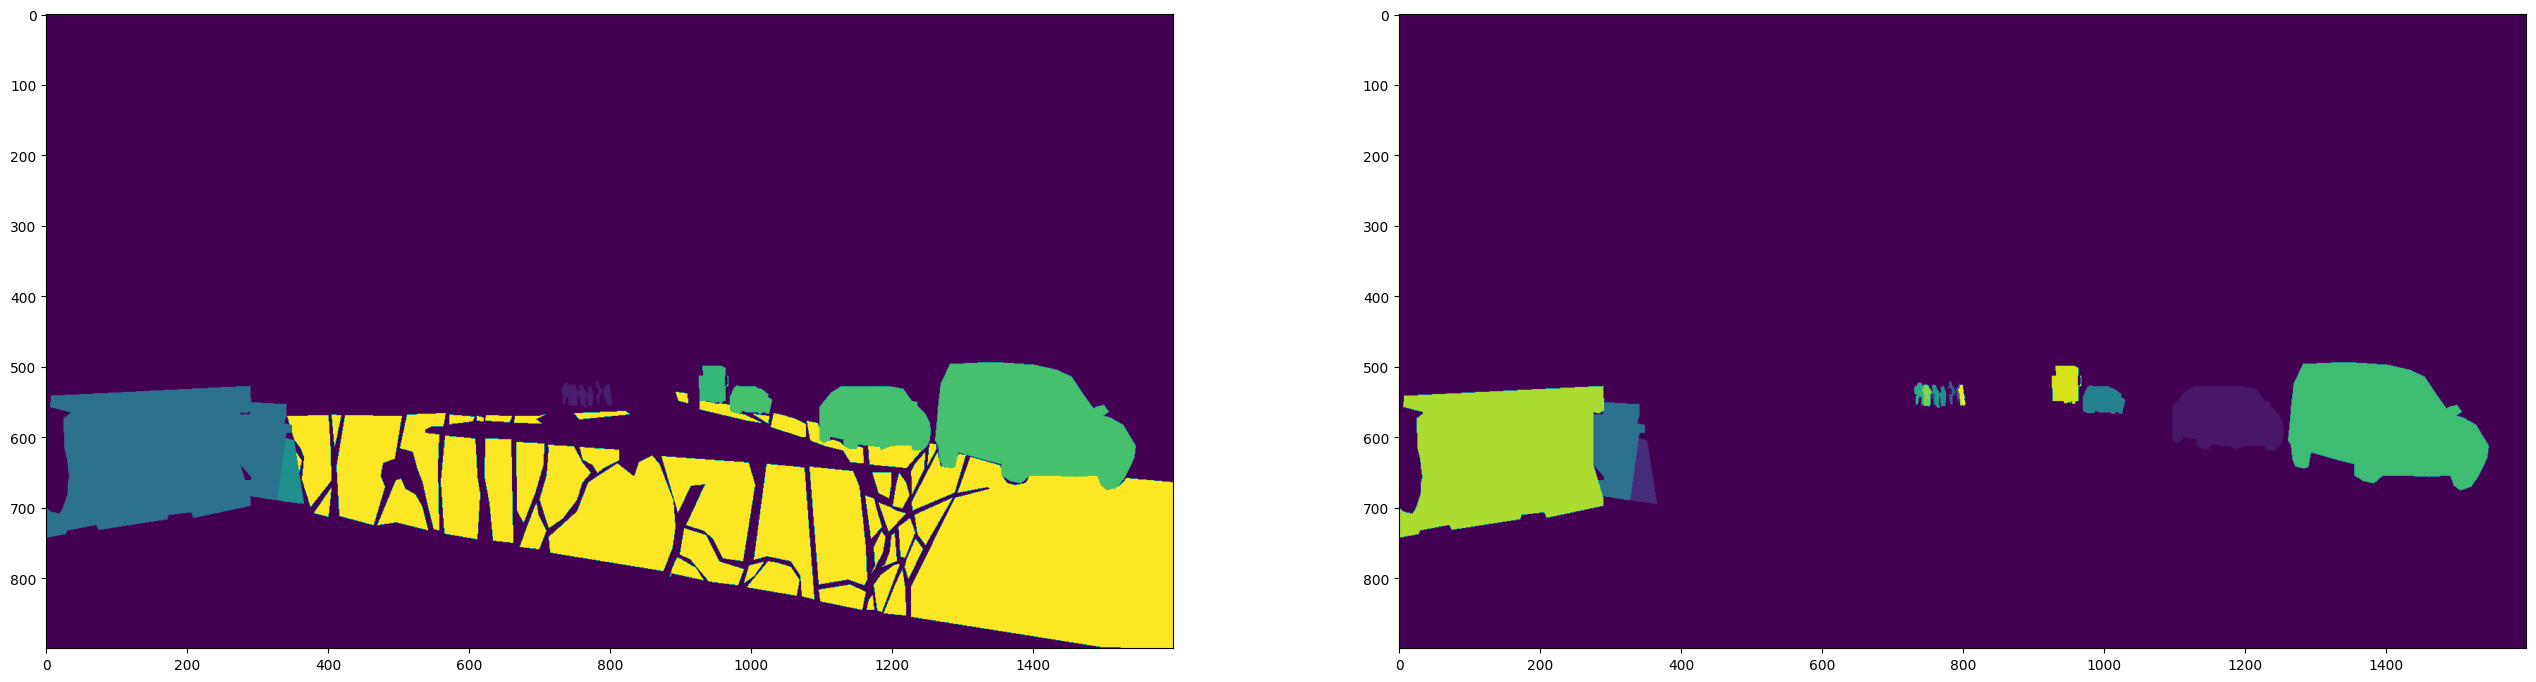

In [12]:
import matplotlib.pyplot as plt

semantic_mask, instance_mask = nuim.get_segmentation(key_camera_token)

plt.figure(figsize=(32, 9))

plt.subplot(1, 2, 1)
plt.imshow(semantic_mask)
plt.subplot(1, 2, 2)
plt.imshow(instance_mask)

plt.show()

In [13]:
nuim.list_sample_content(sample['token'])


Listing sample content...
Rel. time	Sample_data token
     -3.0	0b4fd0e270f2421fbdb7c27caadbc593
     -2.5	f3eadc785a024b3b8af093927d476c2a
     -2.0	aa7dee3a4b824f8a9d894398f18ba1c4
     -1.5	051086dc1e8243fab8731ef5ad7e90a8
     -1.0	26ce6186cc71496fbe07b0b1988c6fb5
     -0.5	24614975bbb34bf385559d958df8008b
      0.0	0128b121887b4d0d86b8b1a43ac001e9
      0.5	5bdc01f564a14f0196817df2a53a41da
      1.0	0a6a50a883f842cba3bf758925b391c6
      1.5	be49e96e81ec4314a6db1f73112ae08f
      2.0	8a18bc3e590b4e0ba904ada6259d1122
      2.5	f1d8370634a948f78084681c25eb9fd6
      3.0	c079819d1520412eb8b99b1c485b1718


In [14]:
next_camera_token = nuim.get('sample_data', key_camera_token)['next']
next_camera_token

'5bdc01f564a14f0196817df2a53a41da'

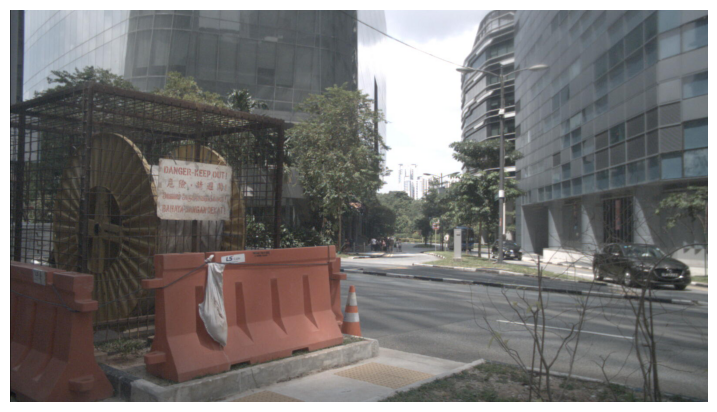

In [15]:
try:
    nuim.render_image(next_camera_token, annotation_type='none')
except Exception as e:
    print('As expected, we encountered this error:', e)

Loaded 650 ego_pose(s) in 0.007s,


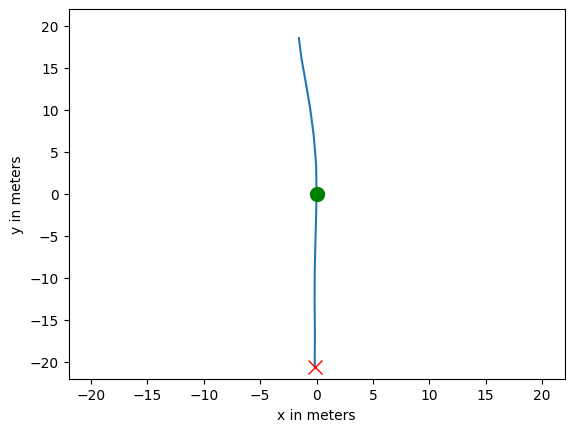

In [16]:
nuim.render_trajectory(sample['token'], rotation_yaw=0, center_key_pose=True)

In [17]:
nuim.list_logs()

Loaded 44 log(s) in 0.001s,

Samples Log                           Location                
     1 n003-2018-01-03-12-03-23+0800 singapore-onenorth      
     1 n003-2018-01-04-11-23-25+0800 singapore-onenorth      
     1 n003-2018-01-08-11-30-34+0800 singapore-onenorth      
     1 n003-2018-07-12-15-40-35+0800 singapore-onenorth      
     1 n004-2018-01-04-11-05-42+0800 singapore-onenorth      
     2 n005-2018-06-14-20-11-03+0800 singapore-onenorth      
     1 n006-2018-09-17-12-15-45-0400 boston-seaport          
     1 n008-2018-03-14-15-16-29-0400 boston-seaport          
     3 n008-2018-05-21-11-06-59-0400 boston-seaport          
     1 n008-2018-05-30-15-20-59-0400 boston-seaport          
     2 n008-2018-05-30-16-31-36-0400 boston-seaport          
     1 n008-2018-06-04-16-30-00-0400 boston-seaport          
     1 n008-2018-09-18-14-18-33-0400 boston-seaport          
     1 n009-2018-05-08-15-52-41-0400 boston-seaport          
     1 n009-2018-09-12-09-59-51-0400 bos

In [18]:
nuim.list_categories(sort_by='object_freq')


Object_anns Surface_anns Name                     Description                                     
        189            0 human.pedestrian.adult   Adult subcategory.                              
        122            0 vehicle.car              Vehicle designed primarily for personal use, e.g
         70            0 movable_object.barrier   Temporary road barrier placed in the scene in or
         44            0 movable_object.trafficco All types of traffic cone.                      
         28            0 vehicle.truck            Vehicles primarily designed to haul cargo includ
         14            0 vehicle.bicycle          Human or electric powered 2-wheeled vehicle desi
         14            0 vehicle.motorcycle       Gasoline or electric powered 2-wheeled vehicle d
          6            0 human.pedestrian.constru Construction worker                             
          5            0 vehicle.bus.rigid        Rigid bus subcategory.                          
         

In [19]:
sample_tokens = [nuim.sample[9]['token']]
nuim.list_categories(sample_tokens=sample_tokens)


Object_anns Surface_anns Name                     Description                                     
          3            0 movable_object.barrier   Temporary road barrier placed in the scene in or
          1            0 human.pedestrian.constru Construction worker                             
          1            0 vehicle.car              Vehicle designed primarily for personal use, e.g
          1            0 vehicle.construction     Vehicles primarily designed for construction. Ty
          1            0 vehicle.truck            Vehicles primarily designed to haul cargo includ
          0            1 flat.driveable_surface   Surfaces should be regarded with no concern of t


In [20]:
nuim.list_attributes(sort_by='freq')


Annotations Name                     Description                                     
        100 pedestrian.moving        The human is moving.                            
         81 vehicle.parked           Vehicle is stationary (usually for longer durati
         66 vehicle.moving           Vehicle is moving.                              
         54 pedestrian.standing      The human is standing.                          
         41 pedestrian.sitting_lying The human is sitting or lying down.             
         24 cycle.without_rider      There is NO rider on the bicycle or motorcycle. 
         15 vehicle.stopped          Vehicle, with a driver/rider in/on it, is curren
          7 cycle.with_rider         There is a rider on the bicycle or motorcycle.  
          0 vehicle_light.emergency. Vehicle is flashing emergency lights.           
          0 vehicle_light.emergency. Vehicle is not flashing emergency lights.       
          0 vertical_position.off_gr Object is not on

In [22]:
nuim.list_sample_data_histogram()


Listing sample_data frequencies..
# images	# samples
      13	50
